In [1]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
print('Current Directory: '+os.getcwd())

CSV_path = 'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_03'
CSV_corrected_path = CSV_path + '\corrected'
print(CSV_corrected_path)

Current Directory: C:\Users\abhim\Documents\Jupyter Notebooks\FGDOS Radiation Testing\HollandPTC-24_03
E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_03\corrected


In [3]:
file_s1 ='FGDOS_03F_HIGH_A14_1_Mar_24_19-16-52_s1.csv'
file_s2 ='FGDOS_03F_HIGH_A14_1_Mar_24_19-16-52_s2.csv'
print(file_s1)
print(file_s2)
df_s1 = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_03\Arduino_CSV\corrected'+ '\\'+ file_s1 ,engine='python')
df_s2 = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_03\Arduino_CSV\corrected'+ '\\'+ file_s2 ,engine='python')


FGDOS_03F_HIGH_A14_1_Mar_24_19-16-52_s1.csv
FGDOS_03F_HIGH_A14_1_Mar_24_19-16-52_s2.csv


In [4]:
s1 = df_s1.to_numpy()
s2 = df_s2.to_numpy()
df_s1.head()
df_s2.head()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
0,0.8963,2,83,53924,72006,0,7.63,h,0,0
1,232.2948,2,83,53024,71990,0,7.63,h,0,0
2,493.6740,2,83,52612,71998,0,7.63,h,0,0
3,756.3172,2,83,52368,71983,0,7.63,h,0,0
4,1018.6958,2,83,52230,71975,0,7.63,h,0,0


In [5]:
# TID Baseline test and to see annealing effects
energy = 70
dose_rate_air = 0.5  # Gy/min
conv_factor = 0.901   # LET protons in Si / Air @ energy
dose_rate_Si = dose_rate_air * conv_factor

In [6]:
s1[s1[:,3]<90000]

array([[0.0, 1, 81, ..., 'h', 0, 0],
       [244.3245, 1, 81, ..., 'h', 0, 0],
       [506.5768, 1, 81, ..., 'h', 0, 0],
       ...,
       [381115.0812, 1, 82, ..., 'h', 0, 0],
       [381377.7598, 1, 82, ..., 'h', 0, 0],
       [381639.8199, 1, 82, ..., 'h', 0, 0]], dtype=object)

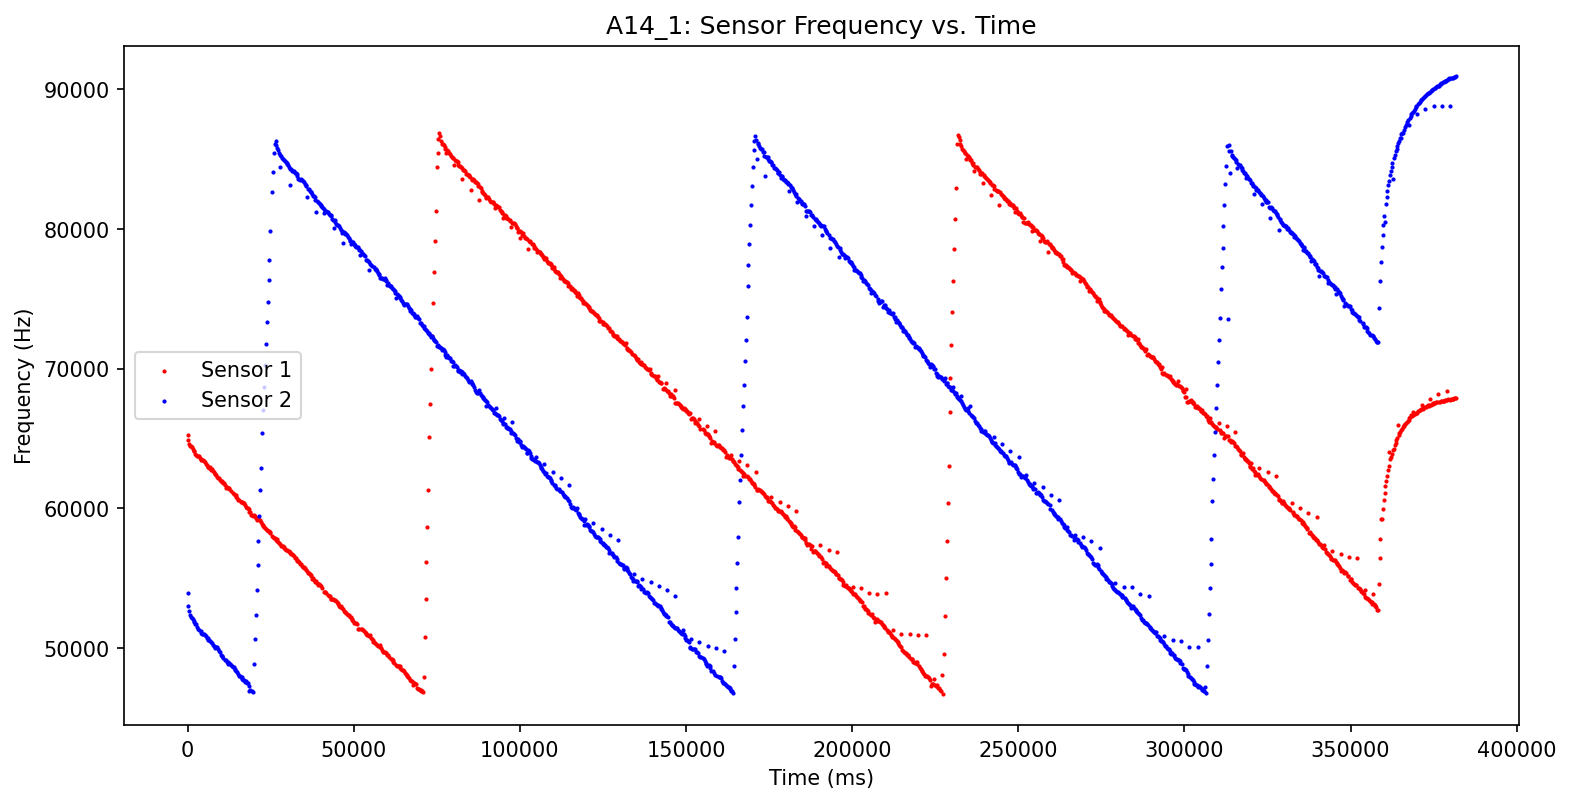

In [7]:
fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(0.6e5,2.2e5)
#plt.xlim(ll_2,ul_2)
#plt.ylim(2.0e5,2.3e5)
plt.legend(loc="center left")
plt.title("A14_1: Sensor Frequency vs. Time")
plt.show()

In [8]:
# Sensor 1 irradiation intervals
#s1[(s1[:,0]> 6.2e4) & (s1[:,0]< 9e4)]
ll_1 = 0.8e5
ul_1 = 2.2e5
zone_1 = s1[(s1[:,0]> ll_1) & (s1[:,0]< ul_1)]

ll_2 = 2.5e5
ul_2 = 3.5e5
zone_2 = s1[(s1[:,0]> ll_2) & (s1[:,0]< ul_2)]

In [9]:
# Sensitivity Sensor 1 - Overall
model_s1 = LinearRegression()
t = s1[1:,0].reshape(-1, 1)
s_freq = s1[1:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.002574062602310301
intercept: [64618.64540756]
slope: [[0.00494805]]
Sensor 1 sensitivity in kHz/Gy:  [[0.65900727]]


In [10]:
# Sensitivity Sensor 1 - Zone 1
model_s1 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.9993250630685322
intercept: [105456.23907992]
slope: [[-0.25673226]]
Sensor 1 sensitivity in kHz/Gy:  [[34.19297573]]


In [11]:
# Sensitivity Sensor 1 - Zone 2
model_s1 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.9990457611308775
intercept: [146222.64298818]
slope: [[-0.26003495]]
Sensor 1 sensitivity in kHz/Gy:  [[34.63284616]]


In [12]:
# Sensor 2 irradiation intervals
ll_1 = 0.4e5
ul_1 = 1.5e5
zone_1 = s2[(s2[:,0]> ll_1) & (s2[:,0]< ul_1)]

ll_2 = 1.8e5
ul_2 = 3.0e5
zone_2 = s2[(s2[:,0]> ll_2) & (s2[:,0]< ul_2)]

In [13]:
# Sensitivity Sensor 2 - Overall
model_s2 = LinearRegression()
t = s2[1:,0].reshape(-1, 1)
s_freq = s2[1:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.03768717265730048
intercept: [64051.94074977]
slope: [[0.02214717]]
Sensor 2 sensitivity in kHz/Gy:  [[2.94967844]]


In [14]:
# Sensitivity Sensor 2 - Zone 1
model_s2 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.9992162200825706
intercept: [93041.03172212]
slope: [[-0.28290245]]
Sensor 2 sensitivity in kHz/Gy:  [[37.6784617]]


In [15]:
# Sensitivity Sensor 2 - Zone 2
model_s2 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)
print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.999140952619727
intercept: [135049.55860343]
slope: [[-0.28885317]]
Sensor 2 sensitivity in kHz/Gy:  [[38.47101105]]


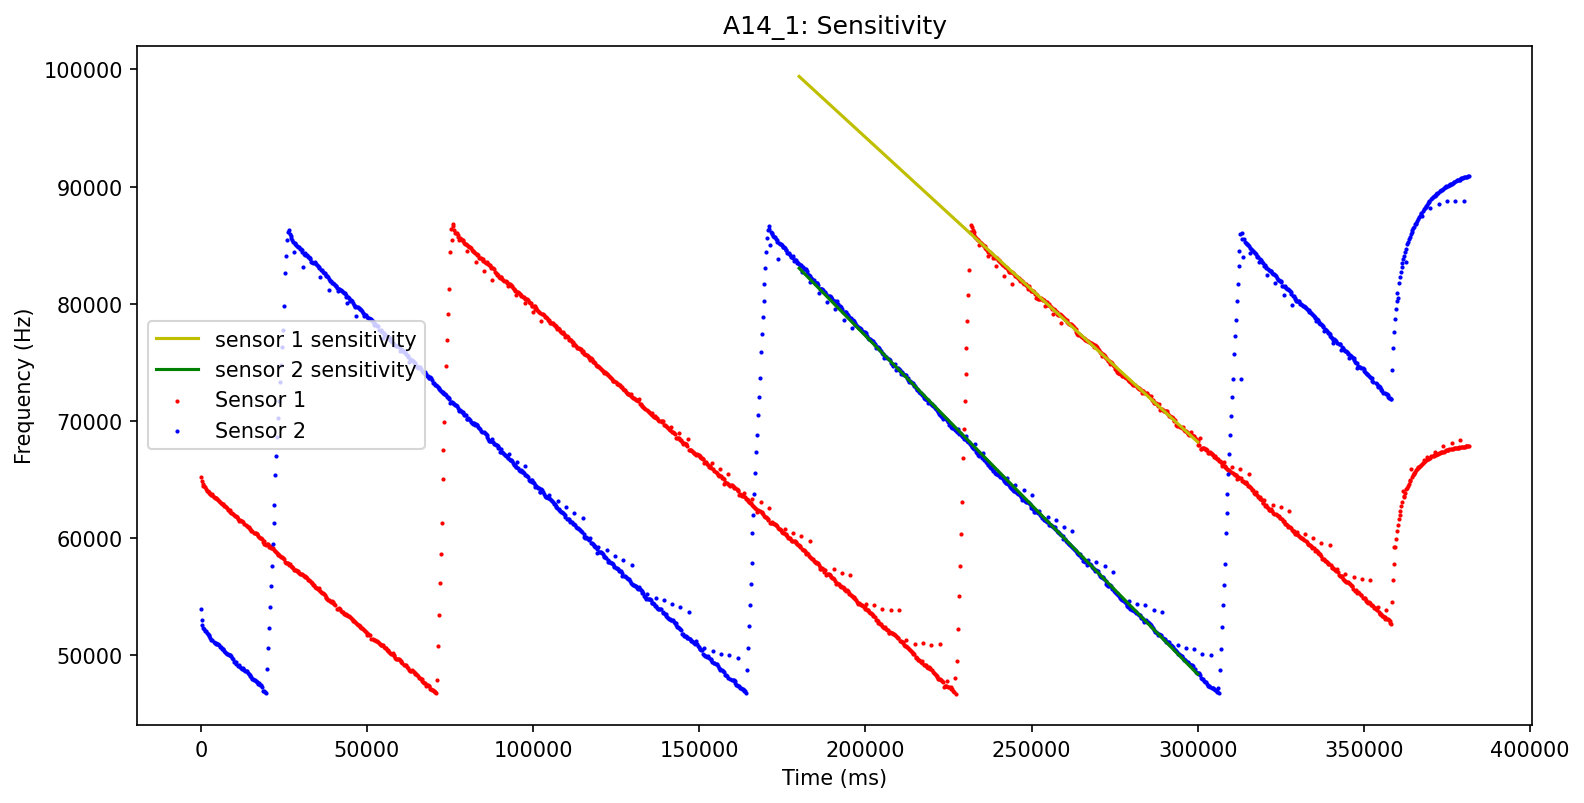

In [21]:
# Plot the linear regression lines
intercept_s1 = model_s1.intercept_
slope_s1 = model_s1.coef_
sensi_s1 = intercept_s1 + t*slope_s1

intercept_s2 = model_s2.intercept_
slope_s2 = model_s2.coef_
sensi_s2 = intercept_s2 + t*slope_s2

fig_sensitivity_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')
plt.plot(t,sensi_s1,'y-',label='sensor 1 sensitivity')
plt.plot(t,sensi_s2,'g-',label='sensor 2 sensitivity')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc="center left")
plt.title("A14_1: Sensitivity")
plt.show()

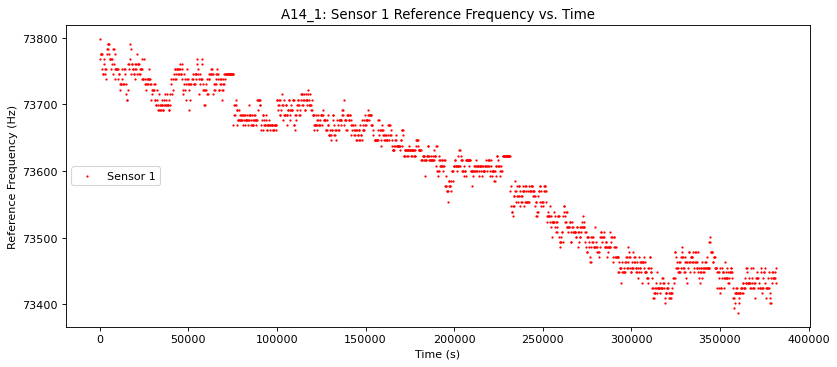

min:  73387
max:  73799
range:  412
mean:  73597.6355585831


In [17]:
fig_ref_freq_s1 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s1[:,0], s1[:,4],s=1, c='r', label = 'Sensor 1')
#plt.scatter(s2[1:,0], s2[1:,4],s=1,label = 'Sensor 2')
#plt.plot(B4_PRE_TEST[1:,0], B4_PRE_TEST[1:,4],"g-",label = 'Reference frequency')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("A14_1: Sensor 1 Reference Frequency vs. Time")
plt.show()
print('min: ',s1[:,4].min())
print('max: ',s1[:,4].max())
print('range: ',s1[:,4].max()-s1[:,4].min())
print('mean: ',s1[:,4].mean())

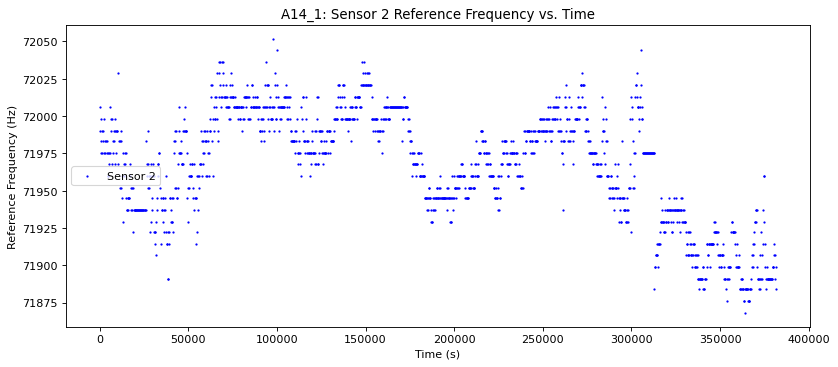

min:  71868
max:  72052
range:  184
mean:  71966.90363881402


In [18]:
fig_ref_freq_s2 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s2[:,0], s2[:,4],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("A14_1: Sensor 2 Reference Frequency vs. Time")
plt.show()

print('min: ',s2[:,4].min())
print('max: ',s2[:,4].max())
print('range: ',s2[:,4].max()-s2[:,4].min())
print('mean: ',s2[:,4].mean())

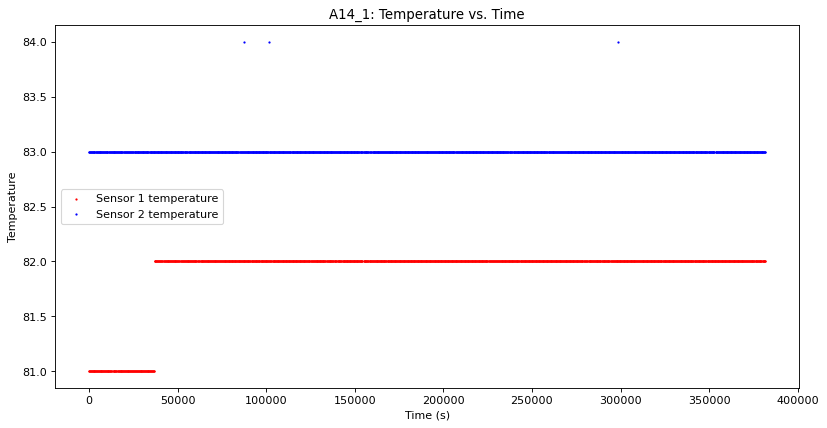

In [19]:
fig_temp = plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(s1[:,0], s1[:,2],s=1,c='r',label = 'Sensor 1 temperature')
plt.scatter(s2[:,0], s2[:,2],s=1,c='b',label = 'Sensor 2 temperature')

plt.xlabel('Time (s)')
plt.ylabel('Temperature')
plt.legend(loc="center left")
plt.title("A14_1: Temperature vs. Time")
plt.show()

In [20]:
s1[:,0].shape
        

(1468,)

In [28]:
#s1[(s1[:,0]> 3e5)]